## Observations and Insights 

In [1]:
# Dependencies and Setup--------------------------------------------------------

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

# Study data files---------------------------------------------------------------

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results--------------------------------------

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset------------------------------------------

mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview----------------------------------------------

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice------------------------------------------------------

print(f"Number of Unique Mice: {mouse_study['Mouse ID'].nunique()}")
print(f"Row Count Based on Mice ID: {len(mouse_study.index)}")

Number of Unique Mice: 249
Row Count Based on Mice ID: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint--
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_search = pd.DataFrame(mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep=False)])
duplicate_search

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID-------------

#For just dropping the duplicates-
#clean_mouse_study = pd.DataFrame(mouse_study.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep = False, inplace = False))


g989 = clean_mouse_study[clean_mouse_study['Mouse ID'] == 'g989' ].index
clean_mouse_study.drop(g989, inplace=True)
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [151]:
# Checking the number of mice in the clean DataFrame------------------------------

print(f"Number of Unique Mice: {clean_mouse_study['Mouse ID'].nunique()}")
print(f"Row Count Based on Mice ID: {len(clean_mouse_study.index)}")
print(f"Dropped {(len(mouse_study.index))-(len(clean_mouse_study.index))} rows of duplicate data. Nice!")

Number of Unique Mice: 248
Row Count Based on Mice ID: 1880
Dropped 13 rows of duplicate data. Nice!


## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Pt. 1 - Create df's for each central tendancy 

mean = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())

median = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())

variance = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())

stdev = pd.DataFrame(clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Pt. 2 - Merge df's and rename

sum_mean_median = pd.merge(mean, median, how ='outer', on='Drug Regimen')

sum_var_stdev = pd.merge(variance, stdev, how ='outer', on='Drug Regimen')

summary = pd.merge(sum_mean_median, sum_var_stdev, how ='outer', on='Drug Regimen')
summary.columns = ['Tumor Volume Mean', 'Tumor Volume Median', 'Tumor Volume Variance', 'Tumor Volume Deviation']
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

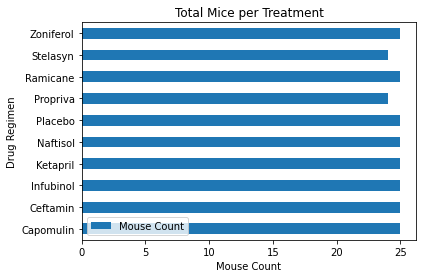

<Figure size 432x288 with 0 Axes>

In [154]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_total_pd = clean_mouse_study.groupby(["Drug Regimen"]).nunique()
bar_total_pd = bar_total_pd.drop(['Timepoint',
                                  'Tumor Volume (mm3)',
                                  'Drug Regimen', 
                                  'Metastatic Sites',
                                  'Age_months',
                                  'Weight (g)',
                                  'Sex'], 1)

bar_total_pd.columns = ['Mouse Count']
bar_total_pd.plot(kind="barh")

# Set a title for the chart
plt.title("Total Mice per Treatment")
plt.xlabel('Mouse Count')
plt.ylabel('Drug Regimen')
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

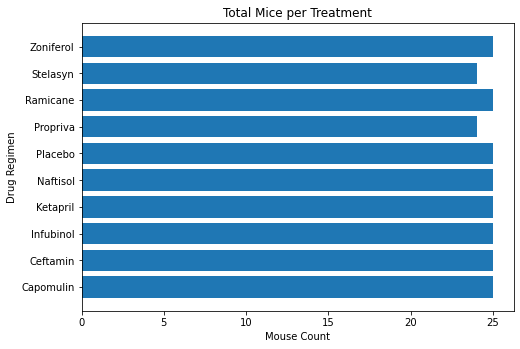

In [157]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
drugs = ['Capomulin',
         'Ceftamin',
         'Infubinol', 
         'Ketapril', 
         'Naftisol', 
         'Placebo',
         'Propriva',
         'Ramicane',
         'Stelasyn',
         'Zoniferol']
mice = [25,25,25,25,25,25,24,25,24,25]
ax.barh(drugs, mice)

# Set a title for the chart
plt.title("Total Mice per Treatment")
plt.xlabel('Mouse Count')
plt.ylabel('Drug Regimen')
plt.show()


,Mouse ID
Sex,
Female,123
Male,125


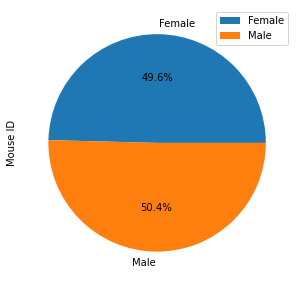

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_study.groupby(["Sex"]).nunique()
gender_count = gender_count.drop(['Timepoint',
                                 'Tumor Volume (mm3)',
                                  'Drug Regimen', 
                                  'Metastatic Sites',
                                  'Age_months',
                                  'Weight (g)',
                                  'Sex'], 1)


gender_count.plot.pie(y='Mouse ID', figsize=(5, 5), autopct='%1.1f%%')

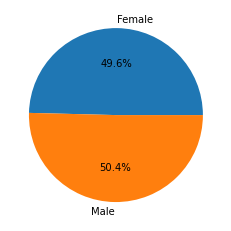

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Female', 'Male'
sizes = [123, 125]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)

plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volumes = pd.DataFrame(clean_mouse_study.groupby('Mouse ID')['Tumor Volume (mm3)', 
                                                                         'Drug Regimen', 
                                                                         'Timepoint'].max())

placebo = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Placebo' ].index
zoniferol = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Zoniferol' ].index
propriva = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Propriva' ].index
stelasyn = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Stelasyn' ].index
naftisol = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Naftisol' ].index
ketapril = final_tumor_volumes[ final_tumor_volumes['Drug Regimen'] == 'Ketapril' ].index

final_tumor_volumes.drop(placebo, inplace=True)
final_tumor_volumes.drop(zoniferol, inplace=True)
final_tumor_volumes.drop(propriva, inplace=True)
final_tumor_volumes.drop(stelasyn, inplace=True)
final_tumor_volumes.drop(naftisol, inplace=True)
final_tumor_volumes.drop(ketapril, inplace=True)

final_tumor_volumes=pd.DataFrame(final_tumor_volumes)
final_tumor_volumes
# This works, but it sure is some ugly code.

,Tumor Volume (mm3),Drug Regimen,Timepoint
Mouse ID,,,
a203,67.973419,Infubinol,45
a251,65.525743,Infubinol,45
a275,62.999356,Ceftamin,45
a411,45.466677,Ramicane,45
a444,45.000000,Ramicane,45
...,...,...,...
y769,68.594745,Ceftamin,45
y793,45.000000,Capomulin,45
y865,64.729837,Ceftamin,45


In [164]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = 'Infubinol', 'Ceftamin', 'Capomulin', 'Ramicane'

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   
    # Locate the rows which contain mice on each drug and get the tumor volumes
infubinol_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Infubinol"]

ceftamin_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Ceftamin"]

capomulin_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Capomulin"]

ramicane_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Ramicane"]

    # add subset 

final_tumors_mod = pd.DataFrame(final_tumor_volumes.groupby('Mouse ID')['Tumor Volume (mm3)'].max())
final_tumors_mod.columns = ['Final Tumor Volume']

    # Determine outliers using upper and lower bounds

lowerq = final_tumors_mod.quantile(.25)
medq = final_tumors_mod.quantile(.5)
upperq = final_tumors_mod.quantile(.75)
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {round(float(lowerq),2)}")
print(f"The upper quartile of tumor volumes is: {round(float(upperq),2)}")
print(f"The interquartile range of tumor volumes is: {round(float(iqr),2)}")
print(f"The the median of tumor volumes is: {round(float(medq),2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(float(lower_bound),2)} could be outliers.")
print(f"Values above {round(float(upper_bound),2)} could be outliers.")

The lower quartile of tumor volumes is: 45.51
The upper quartile of tumor volumes is: 59.93
The interquartile range of tumor volumes is: 14.42
The the median of tumor volumes is: 46.86 
Values below 23.88 could be outliers.
Values above 81.56 could be outliers.


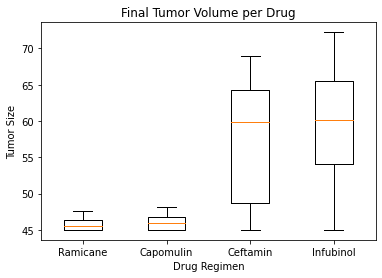

In [165]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ramicane_data2 = ramicane_data['Tumor Volume (mm3)']
capomulin_data2 = capomulin_data['Tumor Volume (mm3)']
ceftamin_data2 = ceftamin_data['Tumor Volume (mm3)']
infubinol_data2 = infubinol_data['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()

data = [ramicane_data2, capomulin_data2, ceftamin_data2, infubinol_data2]

labels = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

ax1.set_title('Final Tumor Volume per Drug')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(data, labels=labels)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Size')

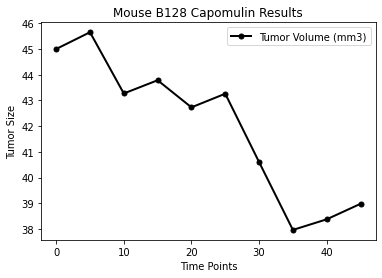

In [166]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_final = pd.DataFrame(clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"])

capomulin_final = capomulin_final.drop(['Metastatic Sites', 
                                        'Drug Regimen', 
                                        'Sex', 
                                        'Age_months', 
                                        'Weight (g)'],
                                        axis=1)

#All mice on line graph----------------------------------
capomulin_big = capomulin_final.set_index('Timepoint')
#--------------------------------------------------------

capomulin_single = capomulin_final
capomulin_single = capomulin_single.loc[capomulin_single['Mouse ID'] == "b128"]
capomulin_single = capomulin_single.set_index('Timepoint')

ax = capomulin_single.plot(lw=2, colormap='gnuplot', marker='.', markersize=10, title='Mouse B128 Capomulin Results')
ax.set_xlabel("Time Points")
ax.set_ylabel("Tumor Size")



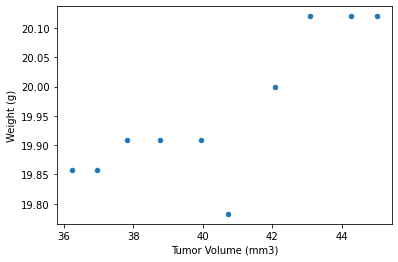

In [167]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Needs work
capomulin_weight = pd.DataFrame(clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"])
capomulin_weight = pd.DataFrame(capomulin_weight.groupby('Timepoint')['Tumor Volume (mm3)', 'Weight (g)'].mean())
capomulin_weight.plot.scatter(x = 'Tumor Volume (mm3)', y = 'Weight (g)')


## Correlation and Regression

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_weight = capomulin_weight['Weight (g)']
average_tumor = capomulin_weight['Tumor Volume (mm3)']
print(f"The correlation coefficient between average weight and tumor is {round(st.pearsonr(average_weight,average_tumor)[0],2)}")

The correlation coefficient between average weight and tumor is 0.82
